# Sentiment Analysis Using Deep Learning
---

## Content

1) **Project Overview**
- Short explanation of the project

2) **Text Preprocessing**
- Contraction Expansion 'cont_exp'
- Email Removal 'remove_emails'
- HTML Tags Removal 'remove_html_tags'
- URL Removal 'remove_urls'
- Special Characters Removal 'remove_special_chars'
- Accented Characters Handling 'remove_accented_chars'
- Text Normalization 'make_base'
- Spelling Correction

3) **Model Implementation**
- GloVe Embedding Integration
- Neural Network Architecture
- Training and Evaluation
---

## Project Overview and Dataset
In this project, we will implement a sentiment analysis model using deep learning techniques. We will work with an English text dataset, perform various preprocessing steps, and implement a neural network model using GloVe embeddings.

We used english text dataset with sentiment labels. Format is .csv

**Import the dataset, and check first few lines**

In [1]:
import pandas as pd
import os

In [2]:
dataset_path = 'data/ENG_SA_Dataset.csv'

if os.path.exists(dataset_path):
    data = pd.read_csv(dataset_path)
    
    print("Dataset loaded successfully!")
    print(data.head())
else:
    print(f"File not found at {dataset_path}. Please check the path and try again.")

Dataset loaded successfully!
      id                                               text  label sentiment
0   9536                    Cooking microwave pizzas, yummy      2  positive
1   6135  Any plans of allowing sub tasks to show up in ...      1   neutral
2  17697   I love the humor, I just reworded it. Like sa...      2  positive
3  14182                       naw idk what ur talkin about      1   neutral
4  17840          That sucks to hear. I hate days like that      0  negative


---
## Text Preprocessing

In [3]:
from autocorrect import Speller
import contractions
import unicodedata
import re

**Contraction Expansion `cont_exp`**
- In here, we will expand contractions in the text (e.g., "don't" → "do not")
- We will use `contractions` library as dictionary

In [4]:
def cont_exp(text):
    if not isinstance(text, str):
        return text
    
    return contractions.fix(text)

**E-Mail Removal `remove_emails`**
- Remove all e-mail addresses from the text
- We will use regex patterns to accomplish that

In [5]:
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b'
handle_pattern = r'@\w+'
combined_pattern = f'({email_pattern})|({handle_pattern})'

def remove_emails(text):
    if not isinstance(text, str):
        return text
    
    # Remove email addresses
    text = re.sub(email_pattern, '', text)
    
    # Remove username adresses
    text = re.sub(handle_pattern, '', text)
    
    # Remove extra spaces resulting from the removals
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

**HTML Tags Removal `remove_html_tags`**
- Remove all URLs from the text
- To do this, we will use regex

In [6]:
def remove_html_tags(text):
    if not isinstance(text, str):
        return ""
    
    return re.sub(r'<[^>]*>', '', text)

**URL Removal `remove_urls`**
- Remove all URLs from the text
- To do that, we will use regex

In [7]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|www\.(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

def remove_urls(text):
    if not isinstance(text, str):
        return text
    
    # Remove URLs
    text = re.sub(url_pattern, '', text)
    
    # Remove extra spaces and trailing punctuation
    clean_text = re.sub(r'\s+', ' ', text).strip()
    
    return text

**Special Character Removal `remove_special_chars`**
- Remove special characters and numbers

In [8]:
special_char_pattern = r'[^A-Za-zÀ-ÿ\s]'

def remove_special_chars(text):    
    if not isinstance(text, str):
        return text
    
    # Remove special characters and numbers
    cleaned_text = re.sub(special_char_pattern, '', text)
    
    # Remove any extra spaces resulting from the removal
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text

**Accented Character Handling `remove_accented_chars`**
- Replace accented characters with their non-accented equivalents
- We will use `unicode` library

In [9]:
def remove_accented_chars(text):
    if not isinstance(text, str):
        return text
    
    # Normalize the text to NFKD form, which separates characters from their diacritics
    normalized_text = unicodedata.normalize('NFKD', text)
    
    # Encode to ASCII bytes, ignoring characters that can't be encoded (i.e., diacritics)
    ascii_bytes = normalized_text.encode('ASCII', 'ignore')
    
    # Decode back to a string
    cleaned_text = ascii_bytes.decode('ASCII')
    
    # Remove any extra spaces resulting from the removal
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text

**Text Normalization `make_base`**
- Convert text to lowercase
- Remove extra whitespaces
- Basic text cleaning and standardization

In [10]:
def make_base(text):
    if not isinstance(text, str):
        return text  
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

**Spelling Correction `correct_spelling`**
- Implement basic spelling correction
    - Since there is a lot of data in dataset, we will choose fastest way to do this
    - We will use `autocorrect` library
- Extract raw sentences after correction

In [11]:
spell = Speller(lang='en')

def correct_spelling(text):
    if not isinstance(text, str):
        return text
    
    # Correct the text
    corrected_text = spell(text)
    
    return corrected_text

**Now, apply all above functions**

In [12]:
# Some contractions uses backticks instead of standard apostrophes, handle it
data['text'] = data['text'].str.replace('`', "'", regex=False)

# Expand contractions by using `cont_exp` method
data['text_expanded'] = data['text'].apply(cont_exp)

# Remove e-mails by using `remove_emails` method
data['text_no_emails'] = data['text_expanded'].apply(remove_emails)

# Remove HTML tags by using `remove_html_tags` method
data['text_no_html'] = data['text_no_emails'].apply(remove_html_tags)

# Remove URL's by using `remove_urls` method
data['text_no_urls'] = data['text_no_html'].apply(remove_urls)

# Remove special characters by using `remove_special_chars` method
data['text_alpha'] = data['text_no_urls'].apply(remove_special_chars)

# Remove accented chars by using `remove_accented_chars` method
data['text_no_accents'] = data['text_alpha'].apply(remove_accented_chars)

# Normalize text by using `make_base` method
data['text_base'] = data['text_no_accents'].apply(make_base)

# Correct spelling errors by using `correct_spelling` method
data['text_final'] = data['text_base'].apply(correct_spelling)

**Now, test the preprocessing steps**

In [13]:
print("Before cont_exp:", data['text'][31203])
print()
print("After cont_exp:", data['text_expanded'][31203])

Before cont_exp: Uninstalled in 5 minutes. It didn't populate anything that I had on my calender. I even tried to manually put in events and it wouldn't show on widget

After cont_exp: Uninstalled in 5 minutes. It did not populate anything that I had on my calender. I even tried to manually put in events and it would not show on widget


In [14]:
print("Before remove_emails:", data['text_expanded'][33])
print()
print("After remove_emails:", data['text_no_emails'][33])

Before remove_emails: @_missrachel how much?

After remove_emails: how much?


In [15]:
print("Before remove_urls:", data['text_no_html'][24])
print()
print("After remove_urls:", data['text_no_urls'][24])

Before remove_urls: http://twitpic.com/3ernb - Loving The Jumper

After remove_urls:  - Loving The Jumper


In [16]:
print("Before remove_special_chars:", data['text_no_urls'][174])
print()
print("After remove_special_chars:", data['text_alpha'][174])

Before remove_special_chars: 💩👎💩👎💩👎💩 👻☠️ IMPOSSIBLE TO DELETE LIST, OR SUB LISTS (TABS)!!! ☠️👻 REGRET v2.0 UPGRADE!! 👎💩👎💩👎💩👎💩👎💩👎💩👎💩👎💩👎💩👎💩👎💩👎💩👎💩👎💩👎💩👎💩👎

After remove_special_chars: IMPOSSIBLE TO DELETE LIST OR SUB LISTS TABS REGRET v UPGRADE


In [17]:
print("Before remove_accented_chars:", data['text_no_urls'][185])
print()
print("After remove_accented_chars:", data['text_no_accents'][185])

Before remove_accented_chars: Es muy útil para mantener las aplicaciones del celular cerradas mientras trabajas.

After remove_accented_chars: Es muy util para mantener las aplicaciones del celular cerradas mientras trabajas


In [18]:
print("Before make_base:", data['text_no_accents'][194])
print()
print("After make_base:", data['text_base'][194])

Before make_base: RadioACTIVE never gets old and never will this is the th time i have listened to the cd its on repeat today and still love it D

After make_base: radioactive never gets old and never will this is the th time i have listened to the cd its on repeat today and still love it d


In [19]:
print("Before correct_spelling:", data['text_base'][397])
print()
print("After correct_spelling:", data['text_final'][397])

Before correct_spelling: feeling sick headache bored tireddd

After correct_spelling: feeling sick headache bored tired


---
## Model Development

**GloVe Embedding Integration**
- Download and load GloVe embeddings
- Use the 100-dimensional GloVe vectors
- Create an embedding matrix for your vocabulary
- Handle words not found in GloVe embeddings

In [20]:
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Bidirectional, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
import requests
import zipfile
import nltk

**Download and load GloVe embeddings**

In [21]:
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_path = "data/glove.6B.zip"
glove_folder = "data/glove.6B/"

# Create the data directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Download the GloVe embeddings if not already downloaded
if not os.path.exists(glove_zip_path):
    print("Downloading GloVe embeddings...")
    response = requests.get(glove_url, stream=True)
    with open(glove_zip_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                file.write(chunk)
    print("Download completed.")
else:
    print("GloVe zip file already exists.")
    
# Extract the embeddings if not already extracted
if not os.path.exists(glove_folder):
    print("Extracting GloVe embeddings...")
    with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
        zip_ref.extractall("data/")
    print("Extraction completed.")
else:
    print("GloVe embeddings already extracted.")

GloVe zip file already exists.
Extracting GloVe embeddings...
Extraction completed.


In [22]:
def load_glove_embeddings(glove_file_path):
    embeddings_index = {}
    
    with open(glove_file_path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector
    print(f"Loaded {len(embeddings_index)} word vectors from GloVe.")
    return embeddings_index

# Path to the 100-dimensional GloVe vectors
glove_file = "data/glove.6B.100d.txt"

# Load embeddings
embeddings_index = load_glove_embeddings(glove_file)

Loaded 400000 word vectors from GloVe.


**Tokenize text using NLTK's word_tokenize**

In [23]:
nltk.download('punkt')

# Convert text to string format for processing
texts = data['text_final'].astype(str).tolist()

# Tokenization
tokenized_texts = [' '.join(word_tokenize(text)) for text in texts]

[nltk_data] Downloading package punkt to /Users/fako/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Create an embedding matrix for your vocabulary**

In [24]:
# Initialize TensorFlow Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_texts)

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {vocab_size}")

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(texts)

max_sequence_length = max(len(seq) for seq in sequences)
print(f"Maximum Sequence Length: {max_sequence_length}")

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='pre')

embedding_dim = 100

# Initialize the embedding matrix with zeros
embedding_matrix = np.zeros((vocab_size, embedding_dim))

Vocabulary Size: 20743
Maximum Sequence Length: 392


**Populate the embedding matrix and handle words not found in GloVe embeddings**
- If word is not found in GloVe, initialize with a random vector

In [25]:
# Populate the embedding matrix
for word, index in tokenizer.word_index.items():
    if index >= vocab_size:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words found in GloVe
        embedding_matrix[index] = embedding_vector
    else:
        # Words not found in GloVe
        # We will initialize with a random vector or keep as zeros
        embedding_matrix[index] = np.random.normal(scale=0.6, size=(embedding_dim,))

embedding_matrix.shape

(20743, 100)

**Neural Network Architecture**
- Input Layer: Tokenized and padded sequences
- Embedding Layer: Using pre-trained GloVe embeddings
- At least one LSTM/GRU layer
- Appropriate dense layers
- Output Layer: Suitable for sentiment classification

In [26]:
model = Sequential()

# Embedding Layer
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    trainable=False))

# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(units=128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2)))

# Dropout Layer
model.add(Dropout(0.5))

# Dense Layer
model.add(Dense(64, activation='relu'))

# Output Layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     2,074,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,074,300 (7.91 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,074,300 (7.91 MB)

In [28]:
X = padded_sequences
y = data['label'].values

# Split the data: 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Test Samples: {X_test.shape[0]}")

X.shape

Training Samples: 24985
Test Samples: 6247


(31232, 392)

In [29]:
# Define Callbacks
early_stop = EarlyStopping(monitor='loss', patience=4, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='loss', save_best_only=True, verbose=1)

# Train the Model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    callbacks=[early_stop, checkpoint],
                    verbose=1)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.4304 - loss: 1.0599
Epoch 1: loss improved from inf to 1.01560, saving model to best_model.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 100s 503ms/step - accuracy: 0.4307 - loss: 1.0596
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.5578 - loss: 0.9285
Epoch 2: loss improved from 1.01560 to 0.91273, saving model to best_model.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 114s 581ms/step - accuracy: 0.5578 - loss: 0.9284
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.5984 - loss: 0.8669
Epoch 3: loss improved from 0.91273 to 0.85723, saving model to best_model.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 114s 582ms/step - accuracy: 0.5985 - loss: 0.8669
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - accuracy: 0.6222 - loss: 0.8302
Epoch 4: loss improved from 0.85723 to 0.82446, saving model to best_model.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 115s 586ms/step - accuracy: 0.6222 - loss: 0.8302
Epoch 5/20
1

**Evaluate the model on test data**

In [30]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.6780 - loss: 0.7221
Test Loss: 0.7235
Test Accuracy: 0.6808


**Report accuracy, precision, recall, and F1-score**

In [31]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

report = classification_report(y_test, y_pred_labels, target_names=['Class 0', 'Class 1', 'Class 2'])
print(report)

accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
f1 = f1_score(y_test, y_pred_labels, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step
              precision    recall  f1-score   support

     Class 0       0.68      0.64      0.66      1824
     Class 1       0.62      0.64      0.63      2322
     Class 2       0.75      0.76      0.75      2101

    accuracy                           0.68      6247
   macro avg       0.68      0.68      0.68      6247
weighted avg       0.68      0.68      0.68      6247

Accuracy: 0.6808
Precision: 0.6811
Recall: 0.6808
F1-Score: 0.6807


**Visualizations**

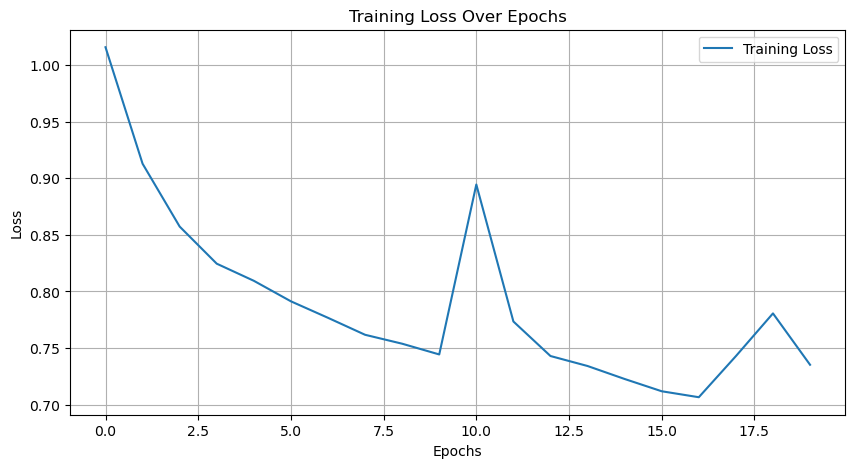

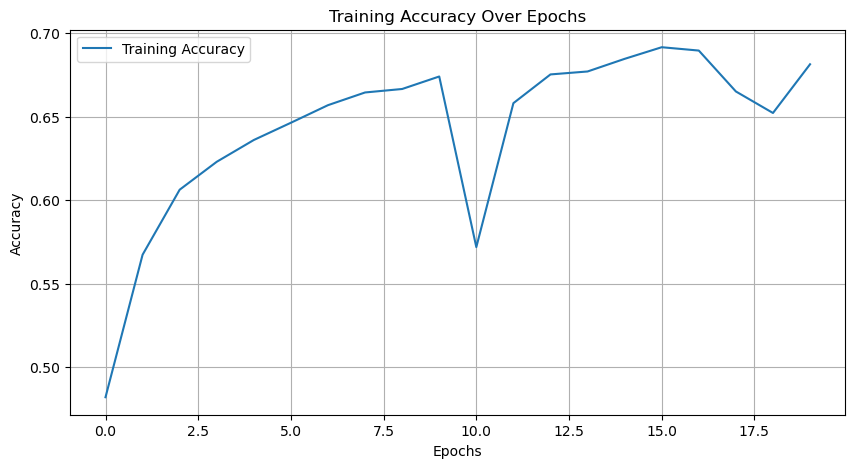

In [32]:
# Plot Training Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()